In [1]:
from tqdm import tqdm
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import gymnasium as gym
from gym.envs.registration import register
import gym_anytrading
from gym import error, spaces, utils


from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

import torch

In [2]:
df = pd.read_csv(r"C:\Users\Vansh\INFY - Copy.csv")

In [3]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [4]:
df.set_index('Date',inplace=True)

In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
03-01-2011,3444.00,3469.7,3427.70,3458.35,631068
04-01-2011,3457.00,3499.0,3457.00,3481.45,1014911
05-01-2011,3465.00,3477.0,3445.10,3459.60,440395
06-01-2011,3480.00,3493.0,3444.10,3478.15,586480
07-01-2011,3463.35,3495.0,3356.35,3370.75,1068866


In [6]:
df.shape

(2558, 5)

In [7]:
env_name = 'stocks-v0'
env = gym.make(env_name)

In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [9]:
env.signal_features

C:\Users\Vansh\Anaconda New\New folder\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 3.45835e+03,  0.00000e+00],
       [ 3.48145e+03,  2.31000e+01],
       [ 3.45960e+03, -2.18500e+01],
       [ 3.47815e+03,  1.85500e+01],
       [ 3.37075e+03, -1.07400e+02],
       [ 3.39575e+03,  2.50000e+01],
       [ 3.32570e+03, -7.00500e+01],
       [ 3.37730e+03,  5.16000e+01],
       [ 3.20520e+03, -1.72100e+02],
       [ 3.20430e+03, -9.00000e-01],
       [ 3.26880e+03,  6.45000e+01],
       [ 3.32300e+03,  5.42000e+01],
       [ 3.24960e+03, -7.34000e+01],
       [ 3.29590e+03,  4.63000e+01],
       [ 3.24385e+03, -5.20500e+01],
       [ 3.28465e+03,  4.08000e+01],
       [ 3.25965e+03, -2.50000e+01],
       [ 3.19690e+03, -6.27500e+01],
       [ 3.16815e+03, -2.87500e+01],
       [ 3.11770e+03, -5.04500e+01],
       [ 3.08920e+03, -2.85000e+01],
       [ 3.08925e+03,  5.00000e-02],
       [ 3.11760e+03,  2.83500e+01],
       [ 3.04790e+03, -6.97000e+01],
       [ 3.08745e+03,  3.95500e+01],
       [ 3.09660e+03,  9.15000e+00],
       [ 3.13070e+03,  3.41000e+01],
 

In [10]:
env.action_space

Discrete(2)

Info (array([[2846.45,    3.95],
       [2849.85,    3.4 ],
       [2837.05,  -12.8 ],
       [2844.5 ,    7.45],
       [2788.65,  -55.85]], dtype=float32), 0, False, False, {'total_reward': -339.699951171875, 'total_profit': 0.8693720997497144, 'position': <Positions.Long: 1>})


C:\Users\Vansh\Anaconda New\New folder\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


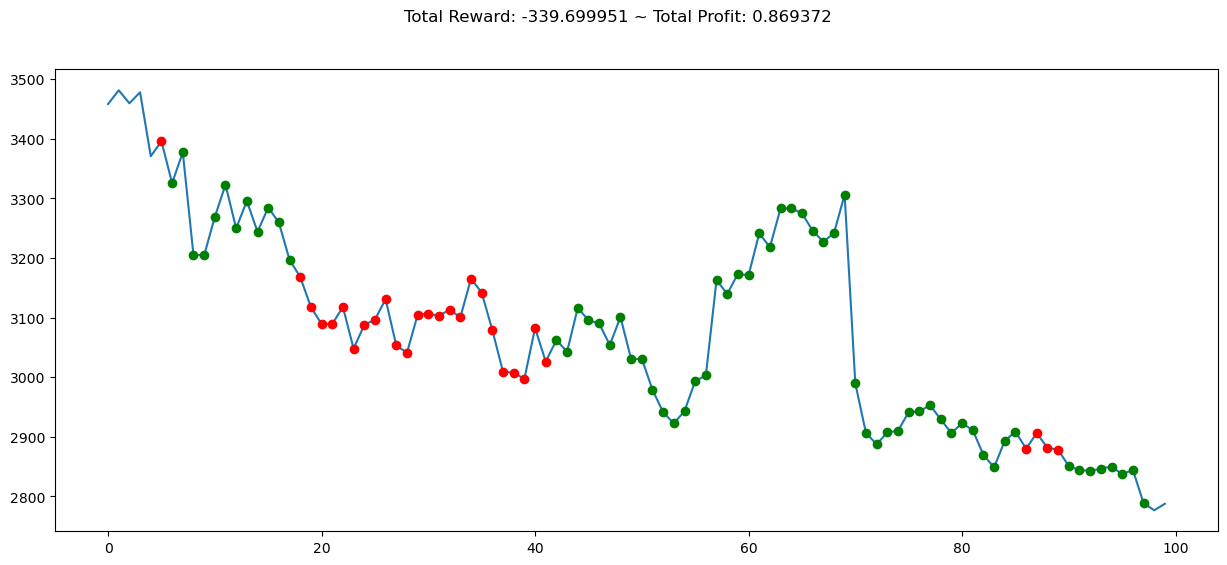

In [11]:
state = env.reset()

while True:
  # action = env.action_space.sample()  # Sample action only once per loop
    for action in range(23): # Use a range for multiple iterations
        action=env.action_space.sample()
        n_state=env.step(action)
        reward=env.step(action)
        done=env.step(action)
        info=env.step(action)

    if done:
        print("Info", info)
        break

# After the loop:
plt.figure(figsize=(15, 6))
plt.gca().clear()  # Use plt.cla() instead of plt.cla
env.render_all()
env.get_wrapper_attr('render_all')  # Likely unnecessary
plt.show()

In [12]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [13]:
df['SMA']=TA.SMA(df,12)
df['RSI']=TA.RSI(df)
df['OBV']=TA.OBV(df)

In [14]:
df.fillna(0,inplace=True)

In [15]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
03-01-2011,3444.00,3469.70,3427.70,3458.35,631068,0.000000,0.000000,0.0
04-01-2011,3457.00,3499.00,3457.00,3481.45,1014911,0.000000,100.000000,1014911.0
05-01-2011,3465.00,3477.00,3445.10,3459.60,440395,0.000000,49.538106,574516.0
06-01-2011,3480.00,3493.00,3444.10,3478.15,586480,0.000000,65.469244,1160996.0
07-01-2011,3463.35,3495.00,3356.35,3370.75,1068866,0.000000,22.054895,92130.0
10-01-2011,3375.00,3443.15,3352.00,3395.75,1298801,0.000000,33.165048,1390931.0
11-01-2011,3340.00,3423.40,3288.10,3325.70,1539927,0.000000,23.190486,-148996.0
12-01-2011,3350.00,3390.00,3318.20,3377.30,1254425,0.000000,37.985976,1105429.0
13-01-2011,3293.00,3299.00,3195.00,3205.20,2794109,0.000000,22.451945,-1688680.0


In [16]:
def add_signals(env):
    start=env.frame_bound[0]-env.window_size
    end=env.frame_bound[1]
    prices=env.df.loc[:,'Close'].to_numpy()[start:end]
    signal_features=env.df.loc[:,['Close','Volume','SMA','RSI','OBV']].to_numpy()[start:end]
    return prices,signal_features

In [17]:
class MyCustomEnv(StocksEnv):
    _process_data=add_signals
    
env2=MyCustomEnv(df=df,window_size=12,frame_bound=(12,100))

In [18]:
env_maker=lambda:env2
env=DummyVecEnv([env_maker])

In [19]:
from stable_baselines3.a2c import MlpPolicy

In [20]:
model=A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=1000000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 789      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.254   |
|    explained_variance | -0.00753 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -164     |
|    value_loss         | 4.48e+04 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 810      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.0552  |
|    explained_variance | -661     |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.00051  |
|    value_loss      

-------------------------------------
| time/                 |           |
|    fps                | 803       |
|    iterations         | 1700      |
|    time_elapsed       | 10        |
|    total_timesteps    | 8500      |
| train/                |           |
|    entropy_loss       | -0.00145  |
|    explained_variance | -25.4     |
|    learning_rate      | 0.0007    |
|    n_updates          | 1699      |
|    policy_loss        | -7.49e-07 |
|    value_loss         | 5.61e-05  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 804      |
|    iterations         | 1800     |
|    time_elapsed       | 11       |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.00134 |
|    explained_variance | -264     |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | 5.29e-06 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 791      |
|    iterations         | 3300     |
|    time_elapsed       | 20       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.00096 |
|    explained_variance | -0.254   |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | 1.31e-07 |
|    value_loss         | 2.61e-06 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 793       |
|    iterations         | 3400      |
|    time_elapsed       | 21        |
|    total_timesteps    | 17000     |
| train/                |           |
|    entropy_loss       | -0.000874 |
|    explained_variance | -9.49e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3399      |
|    policy_loss        | -1.02e-06 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 799       |
|    iterations         | 4900      |
|    time_elapsed       | 30        |
|    total_timesteps    | 24500     |
| train/                |           |
|    entropy_loss       | -0.000384 |
|    explained_variance | -12.4     |
|    learning_rate      | 0.0007    |
|    n_updates          | 4899      |
|    policy_loss        | 3.4e-08   |
|    value_loss         | 1.39e-06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 800       |
|    iterations         | 5000      |
|    time_elapsed       | 31        |
|    total_timesteps    | 25000     |
| train/                |           |
|    entropy_loss       | -0.000383 |
|    explained_variance | -4.36e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 4999      |
|    policy_loss        | -4.92e-07 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 806       |
|    iterations         | 6500      |
|    time_elapsed       | 40        |
|    total_timesteps    | 32500     |
| train/                |           |
|    entropy_loss       | -0.000189 |
|    explained_variance | -14.6     |
|    learning_rate      | 0.0007    |
|    n_updates          | 6499      |
|    policy_loss        | 4.81e-08  |
|    value_loss         | 1.28e-05  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 806       |
|    iterations         | 6600      |
|    time_elapsed       | 40        |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -0.00019  |
|    explained_variance | -2.54e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | -2.94e-08 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 809       |
|    iterations         | 8100      |
|    time_elapsed       | 50        |
|    total_timesteps    | 40500     |
| train/                |           |
|    entropy_loss       | -0.000187 |
|    explained_variance | -121      |
|    learning_rate      | 0.0007    |
|    n_updates          | 8099      |
|    policy_loss        | 2.62e-08  |
|    value_loss         | 4.8e-06   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 809       |
|    iterations         | 8200      |
|    time_elapsed       | 50        |
|    total_timesteps    | 41000     |
| train/                |           |
|    entropy_loss       | -0.000211 |
|    explained_variance | -20.5     |
|    learning_rate      | 0.0007    |
|    n_updates          | 8199      |
|    policy_loss        | 1.28e-07  |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 808      |
|    iterations         | 9700     |
|    time_elapsed       | 59       |
|    total_timesteps    | 48500    |
| train/                |          |
|    entropy_loss       | -0.00019 |
|    explained_variance | -608     |
|    learning_rate      | 0.0007   |
|    n_updates          | 9699     |
|    policy_loss        | 9.46e-08 |
|    value_loss         | 8.13e-05 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 808       |
|    iterations         | 9800      |
|    time_elapsed       | 60        |
|    total_timesteps    | 49000     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | -1.38e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 9799      |
|    policy_loss        | 5.56e-08  |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 806       |
|    iterations         | 11300     |
|    time_elapsed       | 70        |
|    total_timesteps    | 56500     |
| train/                |           |
|    entropy_loss       | -7.76e-05 |
|    explained_variance | -2.39e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11299     |
|    policy_loss        | -5.42e-09 |
|    value_loss         | 5.13e-06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 806       |
|    iterations         | 11400     |
|    time_elapsed       | 70        |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.000107 |
|    explained_variance | -159      |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | 3.02e-08  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 804       |
|    iterations         | 12900     |
|    time_elapsed       | 80        |
|    total_timesteps    | 64500     |
| train/                |           |
|    entropy_loss       | -7.82e-05 |
|    explained_variance | -30.8     |
|    learning_rate      | 0.0007    |
|    n_updates          | 12899     |
|    policy_loss        | -1.72e-08 |
|    value_loss         | 1.03e-05  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 804       |
|    iterations         | 13000     |
|    time_elapsed       | 80        |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -0.000295 |
|    explained_variance | -1.95e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | -3.85e-07 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 803       |
|    iterations         | 14500     |
|    time_elapsed       | 90        |
|    total_timesteps    | 72500     |
| train/                |           |
|    entropy_loss       | -7.96e-05 |
|    explained_variance | -27.3     |
|    learning_rate      | 0.0007    |
|    n_updates          | 14499     |
|    policy_loss        | -1.31e-08 |
|    value_loss         | 5.78e-06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 803       |
|    iterations         | 14600     |
|    time_elapsed       | 90        |
|    total_timesteps    | 73000     |
| train/                |           |
|    entropy_loss       | -0.000283 |
|    explained_variance | 0.334     |
|    learning_rate      | 0.0007    |
|    n_updates          | 14599     |
|    policy_loss        | 2.26e-07  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 802       |
|    iterations         | 16100     |
|    time_elapsed       | 100       |
|    total_timesteps    | 80500     |
| train/                |           |
|    entropy_loss       | -8.12e-05 |
|    explained_variance | -6.28     |
|    learning_rate      | 0.0007    |
|    n_updates          | 16099     |
|    policy_loss        | 4.15e-08  |
|    value_loss         | 5.23e-05  |
-------------------------------------


KeyboardInterrupt: 

Info (array([[ 2.94805000e+03,  1.06705500e+06,  2.87095417e+03,
         6.82562078e+01, -2.27707130e+07],
       [ 2.88335000e+03,  8.63821000e+05,  2.88047083e+03,
         5.77467480e+01, -2.36345340e+07],
       [ 2.87240000e+03,  9.93775000e+05,  2.88567917e+03,
         5.61704418e+01, -2.46283090e+07],
       [ 2.88345000e+03,  1.10855100e+06,  2.89343333e+03,
         5.74331907e+01, -2.35197580e+07],
       [ 2.85665000e+03,  1.22582900e+06,  2.89912083e+03,
         5.34137969e+01, -2.47455870e+07],
       [ 2.84570000e+03,  7.59707000e+05,  2.90284167e+03,
         5.18181259e+01, -2.55052940e+07],
       [ 2.85810000e+03,  2.16940000e+04,  2.90234167e+03,
         5.35117813e+01, -2.54836000e+07],
       [ 2.80985000e+03,  7.22557000e+05,  2.89408333e+03,
         4.66415048e+01, -2.62061570e+07],
       [ 2.85245000e+03,  1.29371100e+06,  2.88613750e+03,
         5.24465285e+01, -2.49124460e+07],
       [ 2.88385000e+03,  9.88571000e+05,  2.88160417e+03,
         5.622672

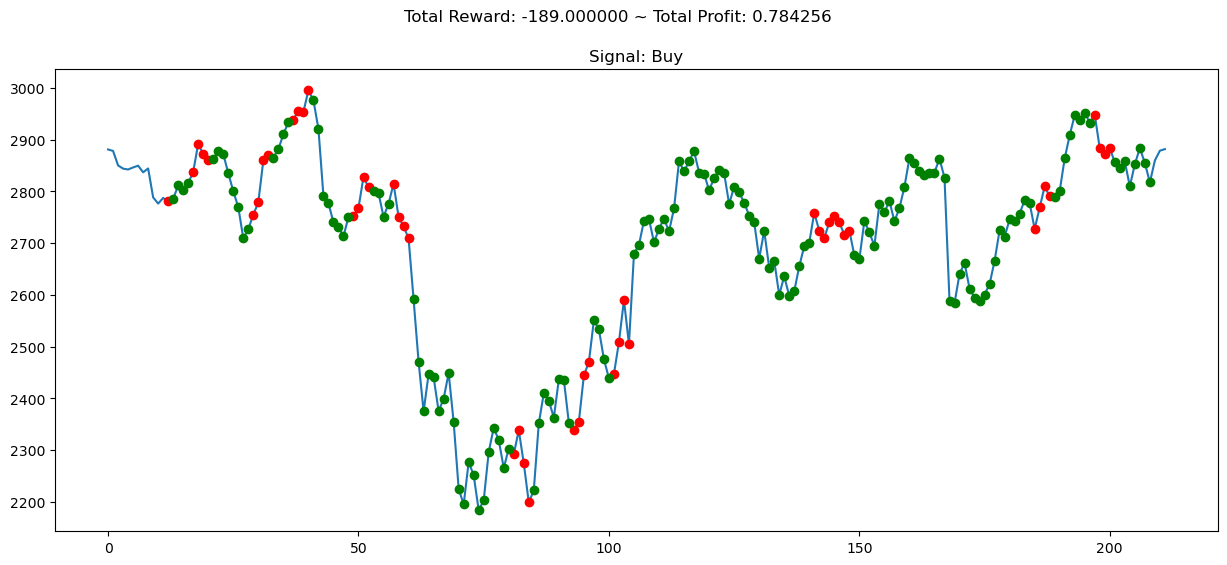

In [21]:
env=MyCustomEnv(df=df,window_size=12,frame_bound=(100,300))
obs = env.reset()

while True:
    for action in range(49):
        obs = np.zeros((1, 12, 5))
        obs = obs[0][:12, :5]
        action = model.predict(obs)[0]  # Get the first action

        # Map action to signal (assuming 0 for sell, 1 for buy)
        signal = "Sell" if action == 0 else "Buy"
        obs = env.step(action)  # Single call to env.step()
        reward=env.step(action)
        done=env.step(action)
        info=env.step(action)
    if done:
        print("Info", info)
        break

plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.title(f"Signal: {signal}")  # Add signal to title
plt.show()